In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import glob
import pandas as pd

Fig. 1C

In [ ]:
EOL_data = {"I213":0.568,"S151":0.644,"Y91":0.577,"W158":0.806,"Y380":0.939,"W155":0.535,"G154":0.858,"Y383":0.577}
DEET_data = {"I213":0.547,"S151":0.567,"Y91":0.695,"W158":0.952,"Y380":0.893,"W155":0.821,"G154":0.840,"Y383":0.242}

def extract_number(label):
    import re
    nums = re.findall(r'\d+', label)
    return int(nums[0]) if nums else 0
sorted_labels = sorted(EOL_data.keys(), key=extract_number)
EOL_values_sorted = [EOL_data[k] for k in sorted_labels]
DEET_values_sorted = [DEET_data[k] for k in sorted_labels]
x = np.arange(len(sorted_labels))
width = 0.35
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, EOL_values_sorted, width, label='EOL',alpha=0.5)
rects2 = ax.bar(x + width/2, DEET_values_sorted, width, label='DEET',alpha=0.5)
ax.set_ylabel('Value')
ax.set_xticks(x)
ax.set_xticklabels(sorted_labels,fontsize=16)
plt.yticks(np.arange(0, 1.1, 0.2),fontsize=16)
plt.xlabel('Residue',fontsize=20)
plt.ylabel('Van der Waals Interaction',fontsize=20)
plt.savefig('finger_vdw.pdf')
plt.tight_layout()
plt.show()

Fig. 1D

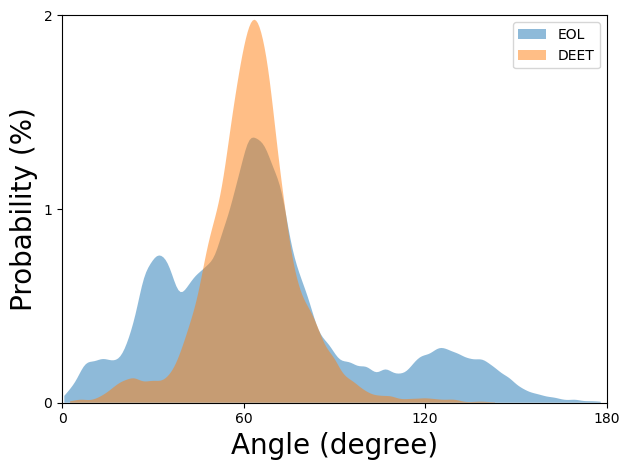

In [ ]:
EOL_data = glob.glob('unbiased/EOL/FES')
DEET_data = glob.glob('unbiased/DEET/FES')
T = 310 
kT = 0.008273338*T
plt.plot()

# EOL Data
for i, data in enumerate(EOL_data):
    x = []
    FES = []
    with open(data) as f:
        xys = f.readlines()[10:]
    for xy in xys:
        x.append(float(xy.split()[0])/3.14*180)
        FES.append(np.exp(-float(xy.split()[1])/kT))     
    Psum = np.sum(FES)
    FES = (FES/Psum)*100
    # Fill the area from y=0 to FES values
    plt.fill_between(x, FES, alpha=0.5, label='EOL')

# DEET Data
for i, data in enumerate(DEET_data):
    x = []
    FES = []
    with open(data) as f:
        xys = f.readlines()[10:]
    for xy in xys:
        x.append(float(xy.split()[0])/3.14*180)
        FES.append(np.exp(-float(xy.split()[1])/kT))     
    Psum = np.sum(FES)
    FES = (FES/Psum)*100
    # Fill the area from y=0 to FES values
    plt.fill_between(x, FES, alpha=0.5, label='DEET')

plt.xlabel('Angle (degree)',fontsize=20)
plt.ylabel('Probability (%)',fontsize=20)
plt.legend()
plt.ylim([0,2.0])
plt.xlim([0,180])
plt.xticks(np.arange(0,181,60))
plt.yticks(np.arange(0,2.1,1))
plt.tight_layout()
plt.savefig('Angle_Filled_FES.pdf',dpi=300)
plt.show() # Use plt.show() to display the plot immediately

Fig. S3

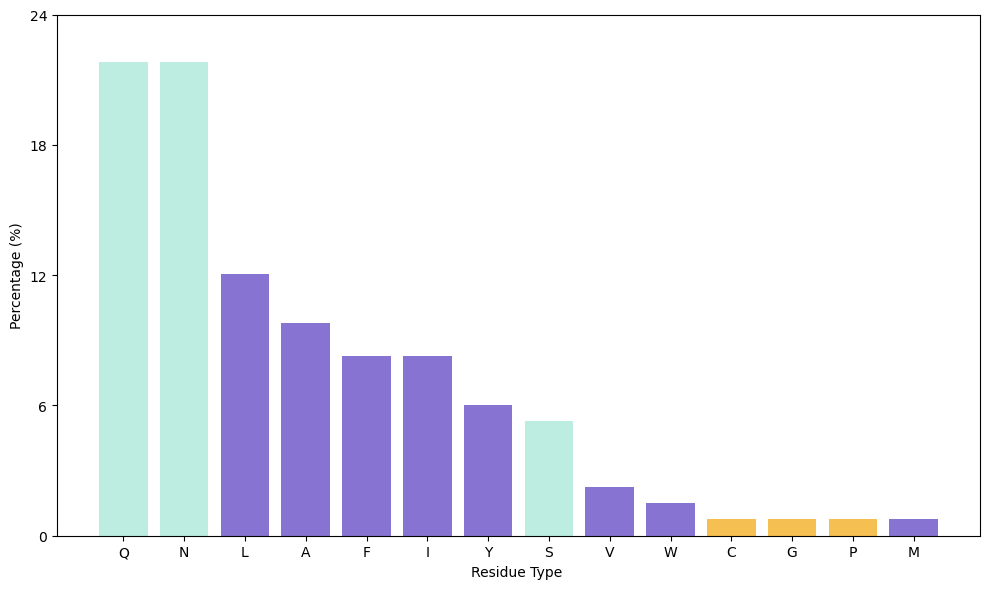

In [ ]:
msa_file = "promsa.csv"

df = pd.read_csv(msa_file,sep=":\t\t",header=None)
msa = df.iloc[:,1]
print(len(msa))
ref_seq = msa[0]
query_seq = msa[1:].to_numpy()
p_positions = [i for i, aa in enumerate(ref_seq) if aa == "P"]
p_site_aas = [j[i] for i in p_positions for j in query_seq]
from collections import Counter
counts = Counter(p_site_aas)
print(counts)

sorted_items = sorted(counts.items(), key=lambda x: x[1], reverse=True)


letters = [item[0] for item in sorted_items]
num = [item[1] for item in sorted_items]

letters = letters
num = num/ np.sum(num)*100
group1 = {'Q', 'S', 'N','T'}
group2 = {'C', 'G', 'P'}
group3 = {'R', 'H', 'K', 'D', 'E'}
group4 = {'A', 'V', 'L', 'I', 'M', 'F', 'Y', 'W'}

COLOR_GROUP1 = '#BDEDE0'  # muted blue
COLOR_GROUP2 = '#F6BF51'  # muted orange
COLOR_GROUP3 = '#C95D63'  # muted green
COLOR_OTHER  = '#8774D2'  # neutral gray

# 为每个字母分配颜色
colors = []
for letter in letters:
    if letter in group1:
        colors.append(COLOR_GROUP1)
    elif letter in group2:
        colors.append(COLOR_GROUP2)
    elif letter in group3:
        colors.append(COLOR_GROUP3)
    elif letter in group4:
        colors.append(COLOR_OTHER)

# 绘制柱状图
plt.figure(figsize=(10, 6))

plt.bar(letters, num, color=colors)
plt.xlabel('Residue Type ')
plt.ylabel('Percentage (%)')
# plt.title('Frequency of Each Residue')
plt.yticks(np.arange(0, max(num)+3, 6))
# 显示图像
plt.tight_layout()
plt.savefig('Proline_substitution_counts.pdf', dpi=300)
plt.show()

Fig. S4

In [ ]:
EOL_data = glob.glob('unbiased/EOL/*.xvg')
DEET_data = glob.glob('unbiased/DEET/*.xvg')

fig,axes = plt.subplots(2,2,figsize=(12,12))

for data in EOL_data:
    x = []
    y = []
    with open(data) as f:
        xys = f.readlines()[18:]
    for xy in xys:
        x.append(float(xy.split()[0])/1000)
        y.append(float(xy.split()[1]))
    axes[0,0].plot(x,y)
    axes[0,0].set_ylabel('RMSD (nm)',fontsize=16)
    axes[0,0].set_title('EOL',  fontsize=16)
    axes[0,0].set_ylim([0,0.8])
    axes[0,0].set_yticks(np.arange(0,0.9,0.2))
    axes[0,0].set_xlim([0,1000])
for data in DEET_data:
    x = []
    y = []
    with open(data) as f:
        xys = f.readlines()[18:]
    for xy in xys:
        x.append(float(xy.split()[0])/1000)
        y.append(float(xy.split()[1]))
    axes[0,1].plot(x,y)
    axes[0,1].set_title('DEET',  fontsize=16)
    axes[0,1].set_ylim([0,0.8])
    axes[0,1].set_xlim([0,1000])
EOL_data = glob.glob('unbiased/EOL/pz*')
DEET_data = glob.glob('unbiased/DEET/pz*')
for data in EOL_data:
    x = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []

    with open(data) as f:
        xys = f.readlines()[1:]
    for xy in xys:
        x.append(float(xy.split()[0]))
        y1.append(float(xy.split()[3])/10)
        y2.append(float(xy.split()[6])/10)
        y3.append(float(xy.split()[9])/10)
        y4.append(float(xy.split()[12])/10)

    axes[1,0].plot(x,y1)
    axes[1,0].plot(x,y2)
    axes[1,0].plot(x,y3)
    axes[1,0].plot(x,y4)
    axes[1,0].set_xlabel('MD Time (ns)',fontsize=16)
    axes[1,0].set_ylabel('D.z (nm)',fontsize=16)
    axes[1,0].set_ylim([-0.1,0.1])
    axes[1,0].set_yticks(np.arange(-0.1,0.11,0.1))
    axes[1,0].set_xlim([0,1000])
    axes[1,0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
for data in DEET_data:
    x = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []

    with open(data) as f:
        xys = f.readlines()[18:]
    for xy in xys:
        x.append(float(xy.split()[0]))
        y1.append(float(xy.split()[3])/10)
        y2.append(float(xy.split()[6])/10)
        y3.append(float(xy.split()[9])/10)
        y4.append(float(xy.split()[12])/10)
    axes[1,1].plot(x,y1)
    axes[1,1].plot(x,y2)
    axes[1,1].plot(x,y3)
    axes[1,1].plot(x,y4)

    axes[1,1].set_xlabel('MD Time (ns)',fontsize=16)
    axes[1,1].set_ylim([-0.1,0.1])
    axes[1,1].set_yticks(np.arange(-0.1,0.11,0.1))
    axes[1,1].set_xlim([0,1000])
    axes[1,1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.tight_layout()
plt.savefig('RMSD_pz.pdf',dpi=300)

Fig. 3B

In [ ]:
# EOL数据
subjects = ['P2', 'P1']
binding_eol = [10,10]
ABMD_eol = [9,1] 
RAMD_eol = [7,3] 
OPES_Flooding_eol = [12,8]

# DEET数据
binding_deet = [4,2]
ABMD_deet = [6,4] 
RAMD_deet = [10,0] 
OPES_Flooding_deet = [5,3]

# 创建上下两个子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 上图：EOL
y_pos = np.arange(len(subjects))
ax1.barh(y_pos, RAMD_eol/np.sum(RAMD_eol)*100, height=0.2, label='RAMD', color='#CDA7BC', alpha=1.0)
ax1.barh(y_pos + 0.2, ABMD_eol/np.sum(ABMD_eol)*100, height=0.2, label='ABMD', color='#B487A3', alpha=1.0)
ax1.barh(y_pos + 0.4, OPES_Flooding_eol/np.sum(OPES_Flooding_eol)*100, height=0.2, label='OPES-Flooding', color='#A96093', alpha=1.0)
ax1.barh(y_pos + 0.65, binding_eol/np.sum(binding_eol)*100, height=0.2, label='Binding', color='#FF69B4', alpha=0.2, edgecolor='#FF0000', linewidth=4)

ax1.set_yticks(y_pos + 0.2)
ax1.set_yticklabels(subjects)
# ax1.set_xlabel('Population (%)', fontsize=20)
ax1.set_ylabel('Pathway', fontsize=30)
# ax1.set_title('EOL', fontsize=20, fontweight='bold')
ax1.set_xlim([0, 101])
ax1.legend(fontsize=14)
ax1.grid(axis='x', alpha=0.3)
# 添加P1和P2.1、P2.1和P2.2之间的分割线
ax1.axhline(y=0.8, color='gray', linestyle='--', alpha=1)
# ax1.axhline(y=1.8, color='gray', linestyle='--', alpha=1)

# 下图：DEET
ax2.barh(y_pos, RAMD_deet/np.sum(RAMD_deet)*100, height=0.2, label='RAMD', color='#CDA7BC', alpha=1.0)
ax2.barh(y_pos + 0.2, ABMD_deet/np.sum(ABMD_deet)*100, height=0.2, label='ABMD', color='#B487A3', alpha=1.0)
ax2.barh(y_pos + 0.4, OPES_Flooding_deet/np.sum(OPES_Flooding_deet)*100, height=0.2, label='OPES-Flooding', color='#A96093', alpha=1.0)
ax2.barh(y_pos + 0.65, binding_deet/np.sum(binding_deet)*100, height=0.2, label='Binding', color='#FF69B4', alpha=0.2, edgecolor='#FF0000', linewidth=4)

ax2.set_yticks(y_pos + 0.2)
ax2.set_yticklabels(subjects)
ax2.set_xlabel('Population (%)', fontsize=30)
ax2.set_ylabel('Pathway', fontsize=30)
# ax2.set_title('DEET', fontsize=20, fontweight='bold')
ax2.set_xlim([0, 101])
# ax2.legend()
ax2.grid(axis='x', alpha=0.3)
# 添加P1和P2.1、P2.1和P2.2之间的分割线
ax2.axhline(y=0.8, color='gray', linestyle='--', alpha=1)
# ax2.axhline(y=1.8, color='gray', linestyle='--', alpha=1)
plt.xticks(np.arange(0,101,20))
plt.tight_layout()
plt.savefig('EOL_DEET_rate.pdf', dpi=300, transparent=True)
plt.show()
